In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss


import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v11'

# label load

In [3]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# Stacked autoencoder

In [7]:
encoding_dim = 4

input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))

encoded = layers.Dense(256, activation='relu')(input_label)
dropout = layers.Dropout(0.2)(encoded)

encoded = layers.Dense(128, activation='relu')(dropout)
encoded = layers.Dense(64, activation='relu')(encoded)
dropout = layers.Dropout(0.2)(encoded)

encoded = layers.Dense(32, activation='relu')(dropout)
encoded = layers.Dense(16, activation='relu')(encoded)
dropout = layers.Dropout(0.2)(encoded)

encoded = layers.Dense(8, activation='relu')(dropout)

latent_space = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(8, activation='relu')(latent_space)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded)

autoencoder = keras.Model(input_label, decoded)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 262)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               67328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080

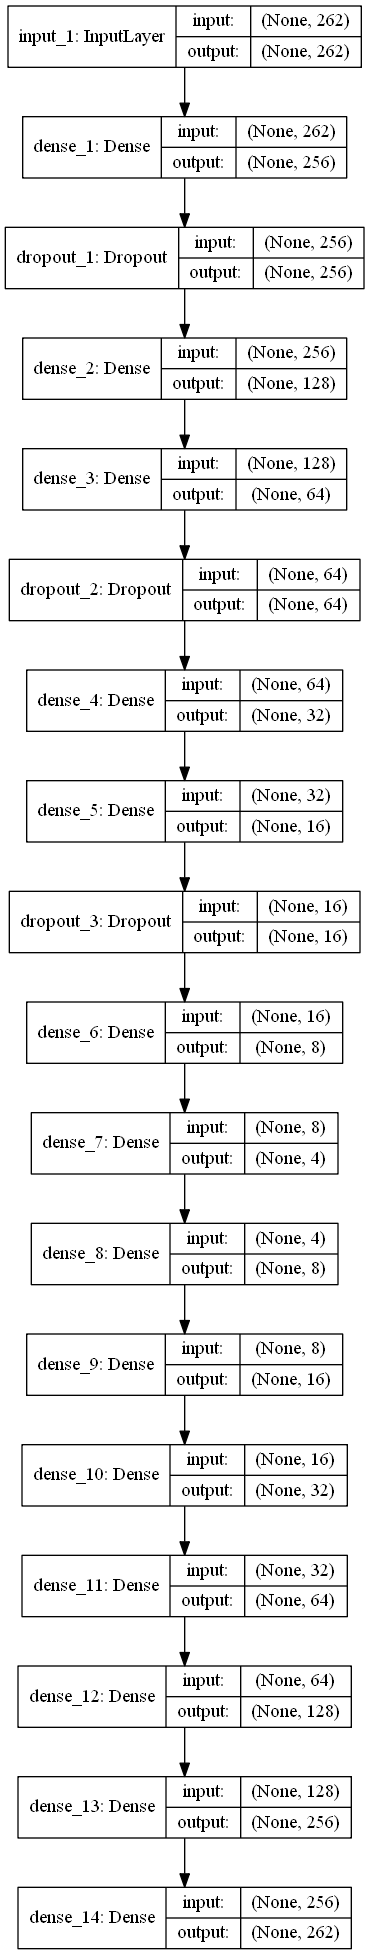

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Stacked_AE_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 262)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               67328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080

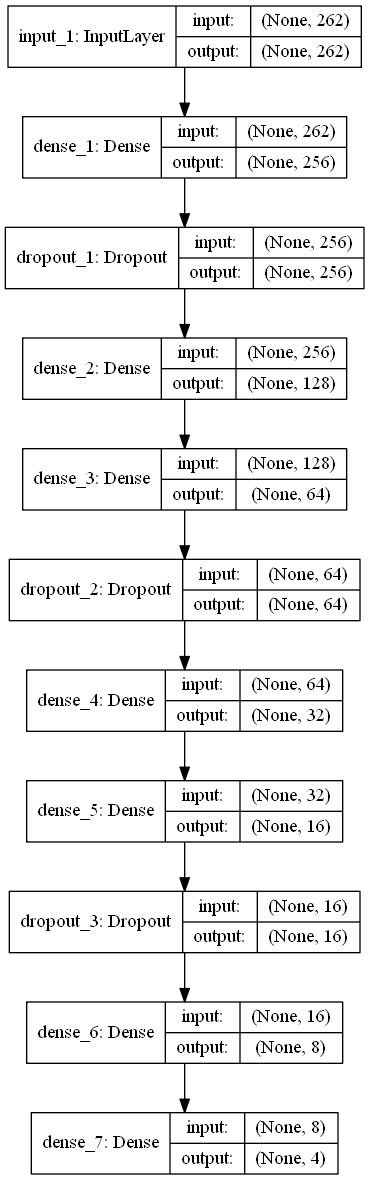

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(encoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(encoder, show_shapes=True, to_file='./img/Stacked_Encoder_{}.png'.format(version))

In [11]:
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer1 = autoencoder.layers[-7](encoded_input)
decoder_layer2 = autoencoder.layers[-6](decoder_layer1)
decoder_layer3 = autoencoder.layers[-5](decoder_layer2)
decoder_layer4 = autoencoder.layers[-4](decoder_layer3)
decoder_layer5 = autoencoder.layers[-3](decoder_layer4)
decoder_layer6 = autoencoder.layers[-2](decoder_layer5)
decoder_layer7 = autoencoder.layers[-1](decoder_layer6)

decoder = keras.Model(encoded_input, decoder_layer7)

decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               3302

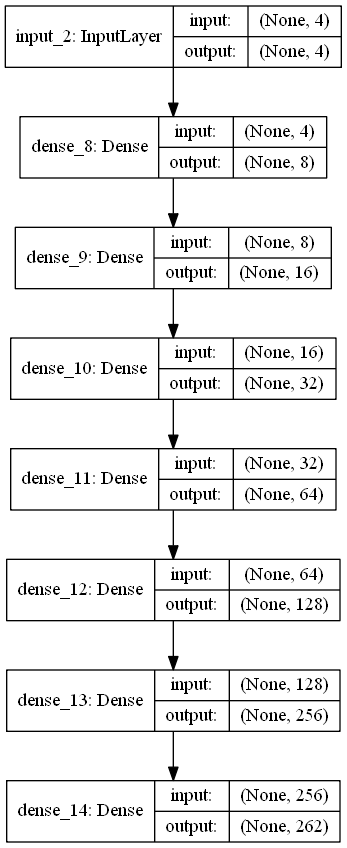

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(decoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(decoder, show_shapes=True, to_file='./img/Stacked_Decoder_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/SAE_{}'.format(version) + '_{epoch:02d}_{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2805 samples, validate on 935 samples
Epoch 1/300
2805/2805 [==============================] - 1s 327us/step - loss: 0.3166 - val_loss: 0.0485

Epoch 00001: saving model to ./trained_model/SAE_v11_01_0.04852.h5
Epoch 2/300
2805/2805 [==============================] - 0s 93us/step - loss: 0.0429 - val_loss: 0.0363

Epoch 00002: saving model to ./trained_model/SAE_v11_02_0.03627.h5
Epoch 3/300
2805/2805 [==============================] - 0s 90us/step - loss: 0.0375 - val_loss: 0.0351

Epoch 00003: saving model to ./trained_model/SAE_v11_03_0.03509.h5
Epoch 4/300
2805/2805 [==============================] - 0s 89us/step - loss: 0.0356 - val_loss: 0.0347

Epoch 00004: saving model to ./trained_model/SAE_v11_04_0.03467.h5
Epoch 5/300
2805/2805 [==============================] - 0s 98us/step - loss: 0.0347 - val_loss: 0.0343

Epoch 00005: saving model to ./trained_model/SAE_v11_05_0.03427.h5
Epoch 6/300
2805/2805 [==============================] - 0s 92us/step - loss: 0.0340 - val_l

2805/2805 [==============================] - 0s 96us/step - loss: 0.0240 - val_loss: 0.0267

Epoch 00048: saving model to ./trained_model/SAE_v11_48_0.02673.h5
Epoch 49/300
2805/2805 [==============================] - 0s 98us/step - loss: 0.0239 - val_loss: 0.0266

Epoch 00049: saving model to ./trained_model/SAE_v11_49_0.02660.h5
Epoch 50/300
2805/2805 [==============================] - 0s 101us/step - loss: 0.0238 - val_loss: 0.0263

Epoch 00050: saving model to ./trained_model/SAE_v11_50_0.02633.h5
Epoch 51/300
2805/2805 [==============================] - 0s 99us/step - loss: 0.0236 - val_loss: 0.0264

Epoch 00051: saving model to ./trained_model/SAE_v11_51_0.02644.h5
Epoch 52/300
2805/2805 [==============================] - 0s 97us/step - loss: 0.0235 - val_loss: 0.0265

Epoch 00052: saving model to ./trained_model/SAE_v11_52_0.02654.h5
Epoch 53/300
2805/2805 [==============================] - 0s 93us/step - loss: 0.0235 - val_loss: 0.0262

Epoch 00053: saving model to ./trained_mo

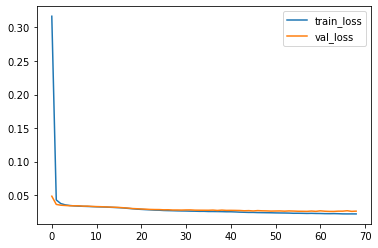

In [16]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [17]:
encoder.save('./trained_model/stacked_encoder_{}.h5'.format(version))
decoder.save('./trained_model/stacked_decoder_{}.h5'.format(version))

# inference

In [18]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[0.0000000e+00, 2.6382292e+01, 0.0000000e+00, 0.0000000e+00],
       [2.7255194e+00, 5.0702071e+00, 4.5253415e+00, 1.6759261e-02],
       [0.0000000e+00, 3.3207331e+00, 2.4584817e-02, 0.0000000e+00],
       ...,
       [8.0416352e-03, 3.4399602e-01, 3.0560637e-02, 0.0000000e+00],
       [3.0853495e-02, 3.8122606e-01, 7.3862813e-02, 0.0000000e+00],
       [0.0000000e+00, 7.4802957e+00, 4.9181792e-01, 0.0000000e+00]],
      dtype=float32)

In [19]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1,2,3
count,935.000000,935.000000,935.000000,935.000000
mean,0.595359,5.016234,1.584960,0.000408
std,1.550411,9.065803,3.498638,0.005207
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.368343,0.000000,0.000000
50%,0.026097,0.793175,0.172538,0.000000
75%,0.111994,5.070207,1.620772,0.000000
max,7.694153,39.403156,17.629826,0.146775


In [20]:
#b.to_excel('./Stacked_AE_v6.xlsx')

In [21]:
encoded_values[:, :]

array([[0.0000000e+00, 2.6382292e+01, 0.0000000e+00, 0.0000000e+00],
       [2.7255194e+00, 5.0702071e+00, 4.5253415e+00, 1.6759261e-02],
       [0.0000000e+00, 3.3207331e+00, 2.4584817e-02, 0.0000000e+00],
       ...,
       [8.0416352e-03, 3.4399602e-01, 3.0560637e-02, 0.0000000e+00],
       [3.0853495e-02, 3.8122606e-01, 7.3862813e-02, 0.0000000e+00],
       [0.0000000e+00, 7.4802957e+00, 4.9181792e-01, 0.0000000e+00]],
      dtype=float32)

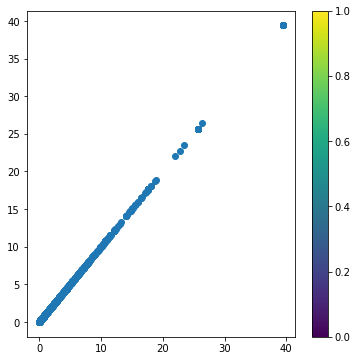

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [23]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[6.61103695e-04, 1.49436481e-03, 1.03126653e-02, ...,
        2.59839091e-03, 1.05643174e-12, 7.11493442e-08],
       [1.63742464e-10, 1.48077916e-05, 6.94177354e-11, ...,
        1.86727846e-06, 2.71161964e-17, 1.08174303e-04],
       [1.67956430e-04, 1.00554107e-02, 1.16937175e-04, ...,
        5.65370219e-03, 6.07848705e-08, 2.47588777e-03],
       ...,
       [1.03035094e-02, 1.37716846e-03, 4.70186770e-01, ...,
        3.58152902e-03, 1.20388884e-02, 1.09256813e-02],
       [8.50651134e-03, 1.28124026e-03, 2.79284835e-01, ...,
        3.15397326e-03, 9.41414665e-03, 8.48389603e-03],
       [1.67318585e-03, 2.02949252e-02, 1.53858936e-03, ...,
        1.31717827e-02, 3.62314267e-08, 6.66621665e-04]], dtype=float32)

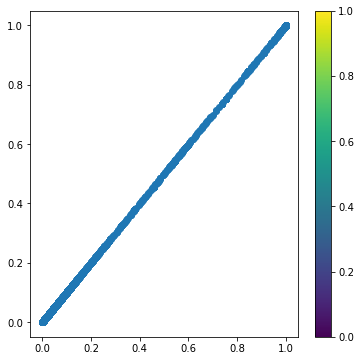

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [25]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
one_hot_test_labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [28]:
c_matrix.shape

(262, 2, 2)

In [29]:
c_matrix

array([[[933,   0],
        [  2,   0]],

       [[928,   0],
        [  7,   0]],

       [[847,  27],
        [ 13,  48]],

       ...,

       [[932,   0],
        [  3,   0]],

       [[934,   0],
        [  1,   0]],

       [[934,   0],
        [  1,   0]]], dtype=int64)

In [30]:
accuracy_score(one_hot_test_labels, predicted_label)

0.18288770053475936

In [31]:
precision_score(one_hot_test_labels, predicted_label, average='micro')

0.8813229571984436

In [32]:
recall_score(one_hot_test_labels, predicted_label, average='micro')

0.2727272727272727

In [33]:
f1_score(one_hot_test_labels, predicted_label, average='micro')

0.416551724137931

In [34]:
hamming_loss(one_hot_test_labels, predicted_label)

0.005180226150140833

In [35]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [36]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [37]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'